In [120]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import scipy.signal.windows as winds

In [121]:
dt = 1 / 500
N = 10000
ts = np.arange(0, dt * N, dt)
signal = (2 * np.sin(2 * np.pi * ts * 15) + 3 * np.sin(2 * np.pi * ts * 14))
signal += 10 * np.random.normal(size=N)

In [122]:
#calc long time fft
fft_long_time = fft(signal)
fft_long_time = 2.0 / N * np.abs(fft_long_time[0:N // 2])
fft_long_time[0] = fft_long_time[0] / 2
freqs_long_time = fftfreq(N, d=dt)[0:N // 2]

In [127]:
#calc mean fft

k = 5
ranges = np.linspace(0, N, k)

batch_size = int(N/k)
fft_batches = np.zeros((k, int(batch_size /2)))
for i in range(0,k-1):
    window = np.ones(batch_size) #winds.hamming(batch_size)
    fft_batches[i] = 2.0 / batch_size * np.abs(fft(signal[int(i * batch_size):int((i + 1) * batch_size)]*window))[0:batch_size // 2]
    fft_batches[i][0] = fft_batches[i][0] / 2.0

freqs_batch = fftfreq(batch_size, d=dt)[0:batch_size // 2]


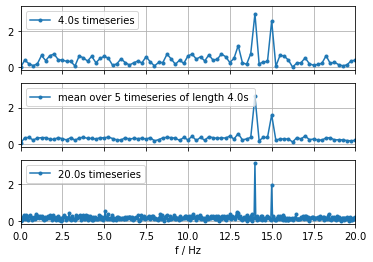

In [128]:

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, sharex=True, sharey=True)

#for fb in fft_batches:
ax0.plot(freqs_batch, fft_batches[0], label = f"{dt * batch_size:.2}s timeseries",  marker=".")
ax0.grid()
ax0.legend()

ax1.plot(freqs_batch, fft_batches.mean(axis=0), label = f'mean over {k} timeseries of length {dt * batch_size:.2}s ', marker=".")
ax1.grid()
ax1.legend(loc=2)



ax2.plot(freqs_long_time, fft_long_time, label = f'{dt*N}s timeseries', marker='.')
ax2.set(xlabel="f / Hz", xlim=[0, 20])
ax2.legend()
ax2.grid()
fig.savefig("out/compare_long_time_vs_batch_mean")

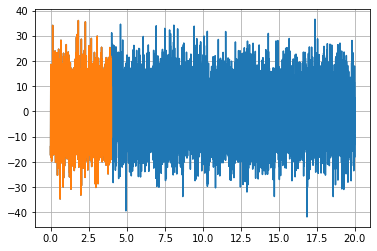

In [129]:
fig2, ax3 = plt.subplots()
ax3.plot(ts, signal)
ax3.plot(ts[0:batch_size], signal[0:batch_size])
ax3.grid()